In [1]:
%matplotlib inline
import networkx as nx
import warnings
warnings.simplefilter("ignore")

## グラフの次数制約付き向き付け

In [2]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2), (1,3), (1,4),
                  (2,4), (2,5), (2,8),
                  (3,4), (3,6),
                  (4,5), (4,6),
                  (5,7), (5,8),
                  (6,7),
                  (7,8)])
indeg_bound1 = {1: 1, 2: 2, 3: 2, 4: 2, 5: 3, 6: 1, 7: 2, 8: 1}

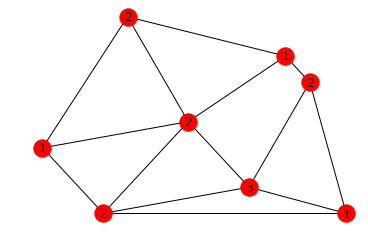

In [3]:
mypos = {1: (0,5), 2: (5,0), 3: (7,15), 
         4: (12,7), 5: (17,2), 6: (20,12),
         7: (22,10), 8: (25,0)}
nx.draw(G, pos = mypos, node_labels = nx.draw_networkx_labels(G, pos = mypos, labels = indeg_bound1))

In [4]:
# ネットワークの作成
G1 = nx.DiGraph()
G1.add_nodes_from(G.nodes)
G1.add_nodes_from(G.edges)
G1.add_nodes_from(['source', 'target'])
for e in G.edges:
    for v in G.nodes:
        if v in e:
            G1.add_edge(e, v, capacity = 1)
for e in G.edges:
    G1.add_edge('source', e, capacity = 1)
for v in G.nodes:
    G1.add_edge(v, 'target', capacity = indeg_bound1[v])

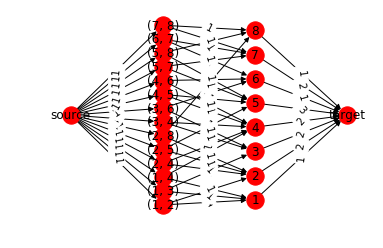

In [5]:
# ネットワークの描画
mypos1 = {}
l = max(G.number_of_nodes(), G.number_of_edges())
mypos1['source'] = (0, 0)
mypos1['target'] = (30, 0)
i = 0
for u in G.nodes:
    mypos1[u] =  (20, ((i+0.5)*(l/G.number_of_nodes())*2-l)*10)
    i = i+1
j = 0
for e in G.edges:
    mypos1[e] = (10, ((j+0.5)*(l/G.number_of_edges())*2-l)*10)
    j = j+1
cap1 = {}
for e in G1.edges():
    cap1[e] = G1.get_edge_data(*e)['capacity']
nx.draw(G1, pos = mypos1, edge_labels = nx.draw_networkx_edge_labels(G1, pos = mypos1, edge_labels = cap1), with_labels = True)

In [6]:
# 最大流を計算する
f1 = nx.maximum_flow(G1, 'source', 'target')
print(f1)
f1[0] == G.number_of_edges()

(14, {1: {'target': 1}, 2: {'target': 2}, 3: {'target': 2}, 4: {'target': 2}, 5: {'target': 3}, 6: {'target': 1}, 7: {'target': 2}, 8: {'target': 1}, (1, 2): {1: 0, 2: 1}, (1, 3): {1: 1, 3: 0}, (1, 4): {1: 0, 4: 1}, (2, 4): {2: 1, 4: 0}, (2, 5): {2: 0, 5: 1}, (2, 8): {2: 0, 8: 1}, (3, 4): {3: 1, 4: 0}, (3, 6): {3: 1, 6: 0}, (4, 5): {4: 0, 5: 1}, (4, 6): {4: 1, 6: 0}, (5, 7): {5: 0, 7: 1}, (5, 8): {5: 1, 8: 0}, (6, 7): {6: 1, 7: 0}, (7, 8): {7: 1, 8: 0}, 'source': {(1, 2): 1, (1, 3): 1, (1, 4): 1, (2, 4): 1, (2, 5): 1, (2, 8): 1, (3, 4): 1, (3, 6): 1, (4, 5): 1, (4, 6): 1, (5, 7): 1, (5, 8): 1, (6, 7): 1, (7, 8): 1}, 'target': {}})


True

In [7]:
# 最大流を描画するための準備
G1f = nx.DiGraph()
G1f.add_nodes_from(G.nodes)
G1f.add_nodes_from(G.edges)
G1f.add_nodes_from(['source', 'target'])
for v in f1[1].keys():
    for u in f1[1][v]:
        if f1[1][v][u] != 0:
            G1f.add_edge(v, u, flow = f1[1][v][u])

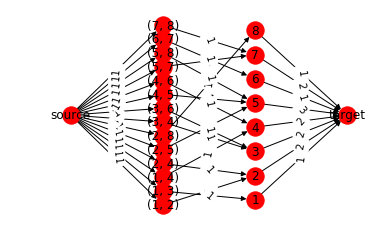

In [8]:
# 最大流の描画
cap1f = {}
for e in G1f.edges:
    cap1f[e] = G1f.get_edge_data(*e)['flow']
nx.draw(G1f, pos = mypos1, edge_labels = nx.draw_networkx_edge_labels(G1f, pos = mypos1, edge_labels = cap1f), with_labels = True)

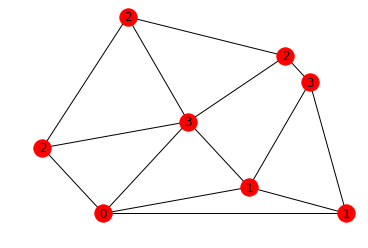

In [9]:
indeg_bound2 = {1: 2, 2: 0, 3: 2, 4: 3, 5: 1, 6: 2, 7: 3, 8: 1}
nx.draw(G, pos = mypos, node_labels = nx.draw_networkx_labels(G, pos = mypos, labels = indeg_bound2))

In [10]:
# ネットワークの作成
G1 = nx.DiGraph()
G1.add_nodes_from(G.nodes)
G1.add_nodes_from(G.edges)
G1.add_nodes_from(['source', 'target'])
for e in G.edges:
    for v in G.nodes:
        if v in e:
            G1.add_edge(e, v, capacity = 1)
for e in G.edges:
    G1.add_edge('source', e, capacity = 1)
for v in G.nodes:
    G1.add_edge(v, 'target', capacity = indeg_bound2[v])

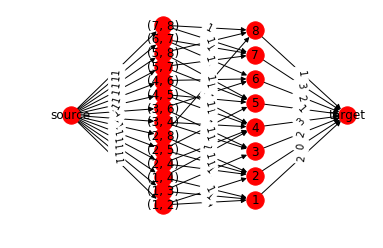

In [11]:
# ネットワークの描画
mypos1 = {}
l = max(G.number_of_nodes(), G.number_of_edges())
mypos1['source'] = (0, 0)
mypos1['target'] = (30, 0)
i = 0
for u in G.nodes:
    mypos1[u] =  (20, ((i+0.5)*(l/G.number_of_nodes())*2-l)*10)
    i = i+1
j = 0
for e in G.edges:
    mypos1[e] = (10, ((j+0.5)*(l/G.number_of_edges())*2-l)*10)
    j = j+1
cap1 = {}
for e in G1.edges():
    cap1[e] = G1.get_edge_data(*e)['capacity']
nx.draw(G1, pos = mypos1, edge_labels = nx.draw_networkx_edge_labels(G1, pos = mypos1, edge_labels = cap1), with_labels = True)

In [12]:
# 最大流を計算する
f1 = nx.maximum_flow(G1, 'source', 'target')
print(f1)
f1[0] == G.number_of_edges()

(13, {1: {'target': 2}, 2: {'target': 0}, 3: {'target': 2}, 4: {'target': 3}, 5: {'target': 1}, 6: {'target': 2}, 7: {'target': 2}, 8: {'target': 1}, (1, 2): {1: 1, 2: 0}, (1, 3): {1: 0, 3: 1}, (1, 4): {1: 1, 4: 0}, (2, 4): {2: 0, 4: 1}, (2, 5): {2: 0, 5: 1}, (2, 8): {2: 0, 8: 0}, (3, 4): {3: 1, 4: 0}, (3, 6): {3: 0, 6: 1}, (4, 5): {4: 1, 5: 0}, (4, 6): {4: 1, 6: 0}, (5, 7): {5: 0, 7: 1}, (5, 8): {5: 0, 8: 1}, (6, 7): {6: 1, 7: 0}, (7, 8): {7: 1, 8: 0}, 'source': {(1, 2): 1, (1, 3): 1, (1, 4): 1, (2, 4): 1, (2, 5): 1, (2, 8): 0, (3, 4): 1, (3, 6): 1, (4, 5): 1, (4, 6): 1, (5, 7): 1, (5, 8): 1, (6, 7): 1, (7, 8): 1}, 'target': {}})


False

In [13]:
# 最大流を描画するための準備
G1f = nx.DiGraph()
G1f.add_nodes_from(G.nodes)
G1f.add_nodes_from(G.edges)
G1f.add_nodes_from(['source', 'target'])
for v in f1[1].keys():
    for u in f1[1][v]:
        if f1[1][v][u] != 0:
            G1f.add_edge(v, u, flow = f1[1][v][u])

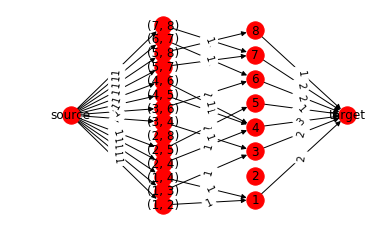

In [14]:
# 最大流の描画
cap1f = {}
for e in G1f.edges:
    cap1f[e] = G1f.get_edge_data(*e)['flow']
nx.draw(G1f, pos = mypos1, edge_labels = nx.draw_networkx_edge_labels(G1f, pos = mypos1, edge_labels = cap1f), with_labels = True)

In [15]:
# 最小s,tカットの計算
c1 = nx.minimum_cut(G1, 'source', 'target')
print(c1)

(13, ({(1, 2), 2, 5, 8, (2, 8), (4, 5), (5, 7), 'source', (2, 5), (7, 8), (2, 4), (5, 8)}, {1, 3, (6, 7), (4, 6), 6, 7, 4, (1, 3), 'target', (1, 4), (3, 6), (3, 4)}))


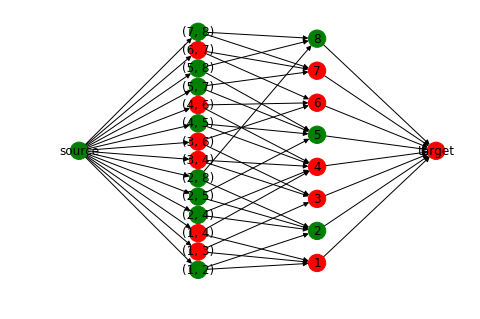

In [16]:
# 最小s,tカットの描画
nodecolor_c = list(map(lambda v: 'g' if v in c1[1][0] else 'r', G1.nodes()))
nx.draw(G1, pos = mypos1, node_color = nodecolor_c, with_labels=True)

## 露天掘り問題

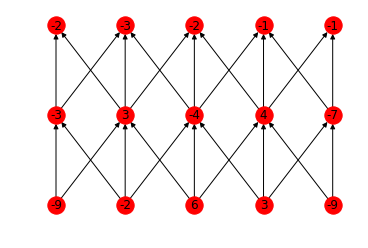

In [17]:
# 露天掘り問題の入力
G2 = nx.DiGraph()
G2.add_nodes_from(list(range(15)))
G2.add_edges_from([(0, 5), (0, 6), (1, 5), (1, 6), (1, 7), (2, 6), (2, 7), (2, 8), (3, 7), (3, 8), (3, 9), (4, 8), (4, 9),
              (5, 10), (5, 11), (6, 10), (6, 11), (6, 12), (7, 11), (7, 12), (7, 13), (8, 12), (8, 13), (8, 14), (9, 13), (9, 14)])
mypos2 = {0: (0, 0), 1: (10, 0), 2: (20, 0), 3: (30, 0), 4: (40, 0),
          5: (0, 10), 6: (10, 10), 7: (20, 10), 8: (30, 10), 9: (40, 10),
          10: (0, 20), 11: (10, 20), 12: (20, 20), 13: (30, 20), 14: (40, 20)}
profit = {0: -9, 1: -2, 2: 6, 3: 3, 4: -9,
          5: -3, 6: 3, 7: -4, 8: 4, 9: -7,
          10: -2, 11: -3, 12: -2, 13: -1, 14: -1}
nx.draw(G2, pos = mypos2, node_labels = nx.draw_networkx_labels(G2, pos = mypos2, labels = profit))

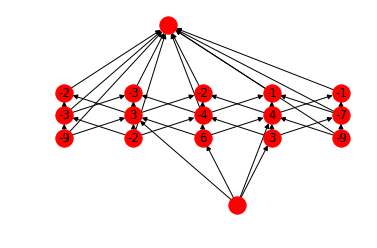

In [18]:
# 最小s,tカット問題へ変換
G2c = nx.DiGraph()
G2c.add_nodes_from(G2.nodes())
G2c.add_edges_from(G2.edges())
for e in G2c.edges():
    nx.set_edge_attributes(G2c, 'capacity', (max(profit)-min(profit))*G2.number_of_nodes())
G2c.add_nodes_from(['s', 't'])
for u in G2.nodes():
    if profit[u] > 0:
        G2c.add_edge('s', u, capacity = profit[u])
    if profit[u] < 0:
        G2c.add_edge(u, 't', capacity = -profit[u])
mypos2['s'] = (25, -30)
mypos2['t'] = (15, 50)
nx.draw(G2c, pos = mypos2, node_labels = nx.draw_networkx_labels(G2c, pos = mypos2, labels = profit))

In [19]:
# 最小s,tカットの計算
c2 = nx.minimum_cut(G2c, 's', 't')
print(c2)

(16, ({2, 6, 7, 8, 10, 11, 12, 13, 14, 's'}, {0, 1, 3, 4, 't', 5, 9}))


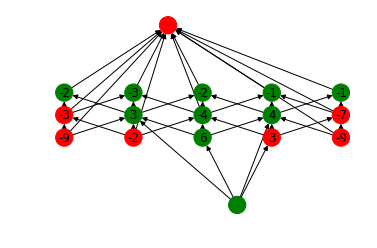

In [20]:
# 最小s,tカットの描画
nodecolor_c = list(map(lambda v: 'g' if v in c2[1][0] else 'r', G2c.nodes()))
nx.draw(G2c, pos = mypos2, node_color = nodecolor_c, node_labels = nx.draw_networkx_labels(G2c, pos = mypos2, labels = profit))

## 画像の領域分割

In [21]:
import math
import itertools
import io
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# 画像の読み込み
f = io.BytesIO(urllib.request.urlopen("https://www.uec.ac.jp/research/information/opal-ring/images/6184-0.jpg").read())
img = Image.open(f)
imgarray = np.array(img)

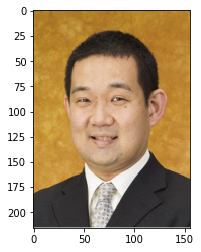

In [23]:
plt.imshow(imgarray) # 画像の表示
width, height = img.size # 画像の大きさ
img_pixels = np.array([[img.getpixel((i,j)) for j in range(height)] for i in range(width)])

In [24]:
# RGB値から強度を計算する
def intensity(r, g, b):
    return 0.2126*r + 0.7152*g + 0.0722*b
# 弧の容量 (sigma はカメラノイズと呼ばれるパラメータ)
def arc_weight(u, v, sigma):
    return math.exp((-(intensity(u[0], u[1], u[2])-intensity(v[0], v[1], v[2]))**2)/(2*(sigma**2)))

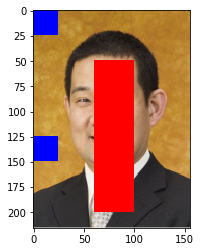

In [25]:
# 物体の一部分を指定
#obj_pixels = list(itertools.product(range(150), range(200, 230))) + list(itertools.product(range(60,100), range(50,200)))
obj_pixels = list(itertools.product(range(60,100), range(50,200)))
# 背景の一部分を指定
bkg_pixels = list(itertools.product(range(25), range(25))) + list(itertools.product(range(25), range(125,150)))

# 指定部分の表示：赤が物体，青が背景
inputimg = Image.new('RGB', (width, height))
for i in range(width):
    for j in range(height):
        if (i,j) in obj_pixels:
            inputimg.putpixel((i,j), (255,0,0))
        elif (i,j) in bkg_pixels:
            inputimg.putpixel((i,j), (0,0,255))
        else:
            inputimg.putpixel((i,j), img.getpixel((i,j)))
inputimgarray = np.array(inputimg)
plt.imshow(inputimgarray)

In [26]:
# ネットワークの作成
G1 = nx.DiGraph()
for i in range(width):
    G1.add_nodes_from([(i,j) for j in range(height)])
G1.add_nodes_from(['source', 'target'])
for i in range(width):
    for j in range(height):
        if i < width-1:
            G1.add_edge((i,j), (i+1,j), capacity = arc_weight(img_pixels[i,j], img_pixels[i+1,j], 1))
            G1.add_edge((i+1,j), (i,j), capacity = arc_weight(img_pixels[i+1,j], img_pixels[i,j], 1))
        if j < height-1:
            G1.add_edge((i,j), (i,j+1), capacity = arc_weight(img_pixels[i,j], img_pixels[i,j+1], 1))
            G1.add_edge((i,j+1), (i,j), capacity = arc_weight(img_pixels[i,j+1], img_pixels[i,j], 1))
        #G1.add_edge('source', (i,j), capacity = 2.3)
        #G1.add_edge((i,j), 'target', capacity = 0)
for p in obj_pixels:
    G1.add_edge('source', p, capacity = width*height)
    G1.add_edge(p, 'source', capacity = 0)
for p in bkg_pixels:
    G1.add_edge('source', p, capacity = 0)
    G1.add_edge(p, 'target', capacity = width*height)

In [27]:
# 最小s,tカットの計算
cut = nx.minimum_cut(G1, 'source', 'target')

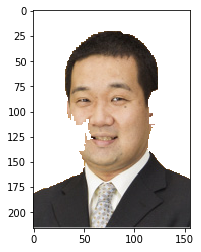

In [28]:
# 計算結果 (出力画像) の表示
outputimg = Image.new('RGB', (width, height))
for i in range(width):
    for j in range(height):
        if (i,j) in cut[1][0]:
            outputimg.putpixel((i,j), img.getpixel((i,j)))
        else:
            outputimg.putpixel((i,j), (255,255,255))
outputimgarray = np.array(outputimg)
plt.imshow(outputimgarray)